In [4]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code

## Import dependencies

In [143]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')
from utils.utils import bootstrap

In [144]:
from IPython.display import HTML

In [145]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from analysis_ion import IonAnalysis
from plots.ionplots import *
from utils.utils import bootstrap
from plots import ionplots

from IPython import get_ipython
import constants as const
import numpy
import math

In [147]:
# Define constants wanted for analysis
tau = 10**(-5)
omega = const.e*0.014/const.mi

ioneffect1 = IonAnalysis(tau=tau,omega=omega)

# Analysis old drift from long runs of different $\omega*\tau$ for time = 3s

100%|██████████| 11/11 [00:00<00:00, 2568.32it/s]
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


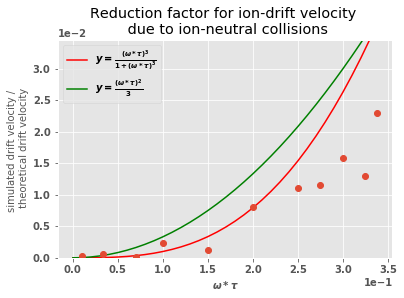

In [148]:
plotolddrifts(fontsize=10, figsize0=20, figsize1=10)


# Analysis C++ 1 second runs ($10^7$ iterations) each with  50 repeats $\tau = 10^{-5}$

In [149]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code/Msci-C++

In [150]:
with open("DRIFTRATIOtauEm5.txt", "r") as driftfile:
    drifts = []
    for line in driftfile:
        drifts.append(float(line.split()[0]))
driftfile.close()

In [151]:
mean, error = bootstrap(drifts)


In [152]:
print("Bootstrap mean and error:", mean, error)


Bootstrap mean and error: 0.0193030466 [-0.0025911602000000047, -0.0018127218]


In [153]:
print("Theoretically, using the", r'$(\omega*\tau)^2/3$',"relationship should give a ratio of:",(const.e*0.014*10**(-5)/const.mi)**2/3)

Theoretically, using the $(\omega*\tau)^2/3$ relationship should give a ratio of: 0.03811249084859944


# Analysis C++ 1 second runs ($10^7$ iterations) each with 20 repeats for $\tau = [5 \times 10^{-7}, 10^{-6}, 2\times10^{-6}, 4\times10^{-6}, 5\times10^{-6}, 8\times10^{-6}, 2\times10^{-5}]$

In [154]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code/Msci-C++/driftschangetau

In [155]:
means = []
errors = []
maxdiff = []
for i in range(1,8):
    drifts = []
    with open("DRIFT{}.txt".format(str(i)),'r') as driftfile:
        for line in driftfile:
            drifts.append(float(line.split()[0]))
    mean, error = bootstrap(drifts,10000)
    means.append(mean)
    maxdiff.append(max(drifts)-mean)
    errors.append(error)

errors = numpy.array(errors)
omega = const.e*0.014/const.mi
taulist = numpy.array([5*10**(-7), 10**(-6), 2*10**(-6), 4*10**(-6), 5*10**(-6), 8*10**(-6), 2*10**(-5)])
omegatau = omega*taulist


## More trials same set-up as before, but with 	$\tau = [8.9 \times 10^{-6}, 9.5 \times 10^{-6}, 10^{-5},1.5 \times 10^{-5},1.7\times10^{-5}]$

In [156]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code/Msci-C++/driftschangetau2

In [157]:
means2 = []
errors2 = []
for i in range(1,6):
    drifts = []
    with open("2DRIFT{}.txt".format(str(i)),'r') as driftfile:
        for line in driftfile:
            drifts.append(float(line.split()[0]))
    mean, error = bootstrap(drifts)
    means2.append(mean)
    errors2.append(error)

errors2 = numpy.array(errors2)
taulist2 = numpy.array([8.9*10**(-6), 9.5*10**(-6), 10**(-5), 1.5*10**(-5), 1.7*10**(-5)])
omegatau2 = omega*taulist2


## Plot everything - deterministic method giving ion thermal kicks

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


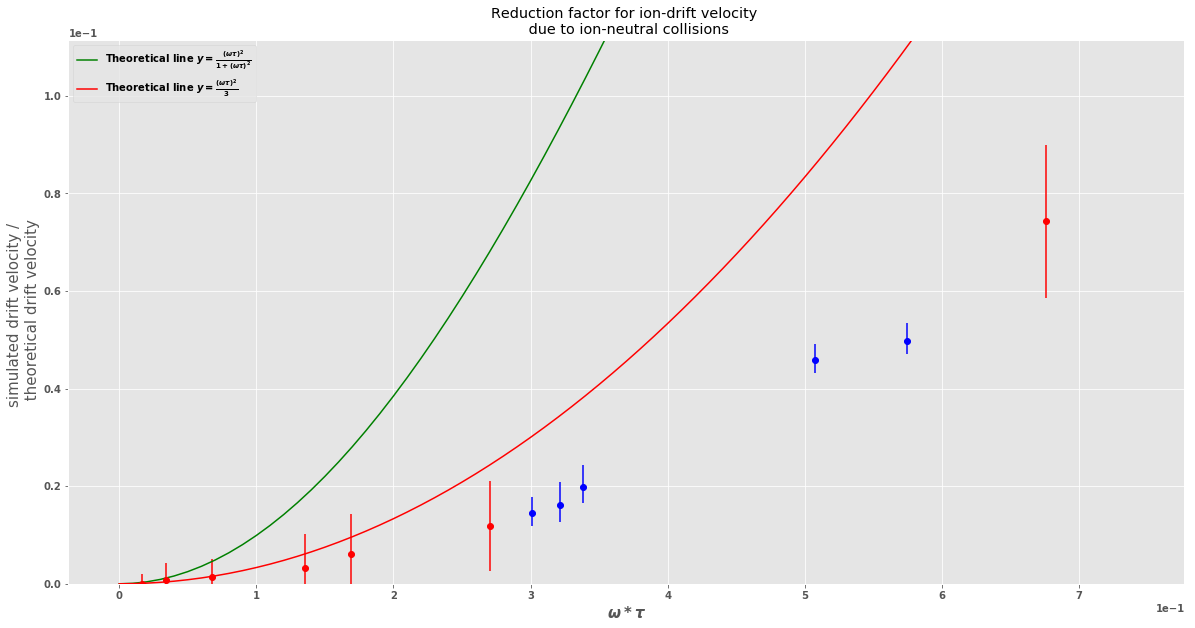

In [158]:
plt.errorbar(omegatau,means, yerr = [maxdiff,maxdiff], fmt='ro',capthick = 2)
plt.errorbar(omegatau2, means2, yerr = [errors2[:,0], errors2[:,1]], fmt = 'bo' , capthick = 2)
theoryx = numpy.arange(0, omega*max([max(taulist),max(taulist2)])*1.1, 10 ** (-2))
plt.plot(theoryx, theoryx**2/(1+theoryx**2), 'g-', label=r'Theoretical line $y=\frac{(\omega \tau)^2}{1+(\omega \tau)^2}$')
plt.plot(theoryx, theoryx**2/(3), 'r-', label=r'Theoretical line $y=\frac{(\omega \tau)^2}{3}$')           
plt.xlabel(r"$\omega*\tau$", fontsize=fontsize)
plt.ylabel("simulated drift velocity / \n theoretical drift velocity", fontsize=fontsize)
plt.title("Reduction factor for ion-drift velocity \n due to ion-neutral collisions")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.ylim([0,max([max(means),max(means2)])*1.5])
plt.legend(loc=2)
plt.show()

Note that the simulation is a deterministic model, giving the particle a kick at every time step = $\tau$. $\tau$ is the average of the exponential distribution, the probability distribution that the collisions of ions with neutrals should follow. The mismatch between the theoretically derived result for the ratio with $(\omega \tau)^2/3$ dependence and the simulation results may be because 1s is still too short for equilibrium. Thus it may be interesting to change the simulation such that at every time step the probability of collision (i.e. thermal kick) is drawn from an exponential distribution. So far the model deterministically causes the ion to collide at every time interval $\tau$ and thus this means the simulation should drift a lot less than theoretically, which is what is observed. Also note that multiple collisions are not considered, as we are following the trajectory of one ion. In the new proposed simulation, at every time step dt, the probability of no collisions is given by $e^{-dt/\tau}$ which means that the probability of colliding within this time step is $1-e^{-dt/\tau}$. Thus to implement this, at every time step dt, a number is drawn from a uniform random distribution and if it is smaller than or equal to $1-e^{-dt/\tau}$, the particle is given a thermal kick.

# Analysis C++ using new thermalkickexponential technique discussed earlier. 20 trials per $\omega \tau$ value again, and 1s intervals. $\tau = [5\times10^{-7},4\times10^{-6},8\times10^{-6}, 9.5 \times 10^{-6}, 10^{-5},1.2\times10^{-5},1.7\times10^{-5},2\times10^{-5}]$

In [166]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code/Msci-C++/driftsthermalexponentialchangetau

In [167]:
meansexp = []
errorsexp = []
for i in range(1,9):
    drifts = []
    with open("NEWDRIFT{}.txt".format(str(i)),'r') as newdriftfile:
        for line in newdriftfile:
            drifts.append(float(line.split()[0]))
    mean, error = bootstrap(drifts)
    meansexp.append(mean)
    errorsexp.append(error)

errorsexp = numpy.array(errorsexp)
taulistexp = numpy.array([5*10**(-7), 4*10**(-6), 8*10**(-6), 9.5*10**(-6), 10**(-5), 1.2*10**(-5), 1.7*10**(-5), 2*10**(-5)])
omegatauexp = omega*taulistexp

# Same simulation as before using the probabilistic exponential thermal kick but with tau values $\tau = [10^{-6}, 6 \times 10^{-6}, 1.1\times 10^{-5}, 1.3 \times 10^{-5}, 1.4 \times 10^{-5}, 1.5 \times 10^{-5}, 1.6 \times 10^{-5}, 1.9 \times 10^{-5}]$

In [170]:
%%capture 
cd ~/Dropbox/Msci-DustyPlasmas/Code/Msci-C++/driftsthermalexponentialchangetau2


In [171]:
meansexp2 = []
errorsexp2 = []
for i in range(1,9):
    drifts = []
    with open("2NEWDRIFT{}.txt".format(str(i)),'r') as newdriftfile:
        for line in newdriftfile:
            drifts.append(float(line.split()[0]))
    mean, error = bootstrap(drifts)
    meansexp2.append(mean)
    errorsexp2.append(error)

errorsexp2 = numpy.array(errorsexp2)
taulistexp2 = numpy.array([10**(-6), 6*10**(-6), 1.1*10**(-5), 1.3*10**(-5), 1.4*10**(-5), 1.5*10**(-5), 1.6*10**(-5), 1.9*10**(-5)])
omegatauexp2 = omega*taulistexp2

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


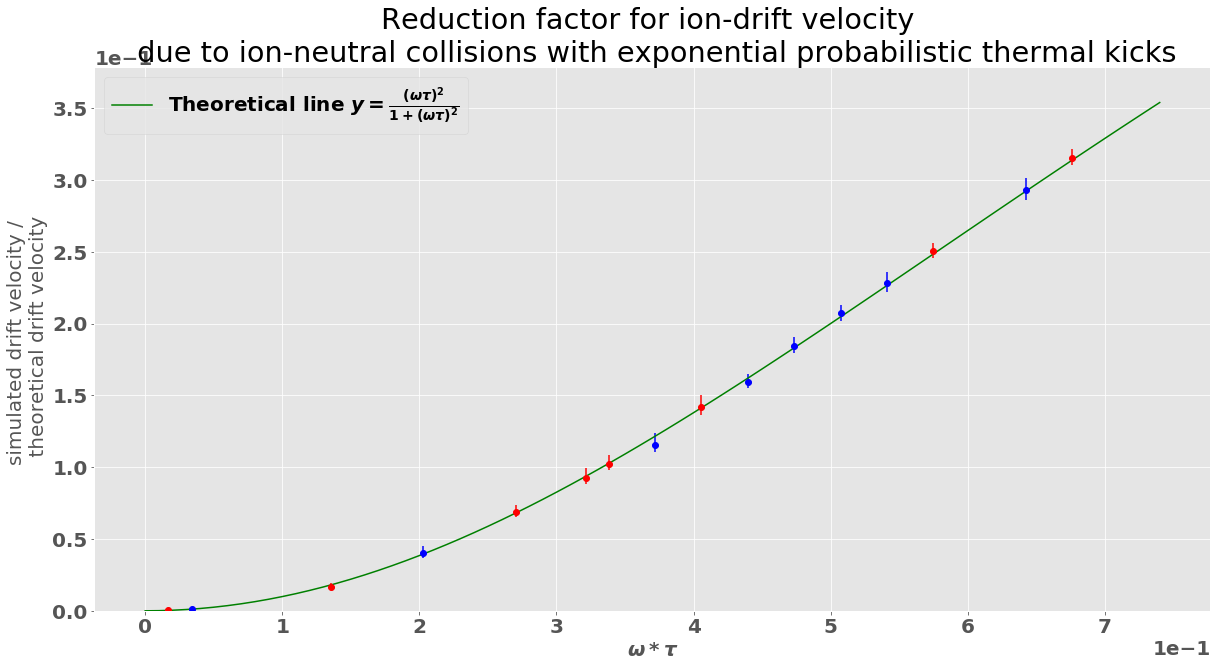

In [172]:
fontsize = 20
font = {'family': 'normal',
            'weight': 'bold',
            'size': fontsize}
matplotlib.rc('font', **font)
plt.errorbar(omegatauexp,meansexp, yerr = [errorsexp[:,0], errorsexp[:,1]], fmt='ro',capthick = 2)
plt.errorbar(omegatauexp2, meansexp2, yerr = [errorsexp2[:,0], errorsexp2[:,1]], fmt = 'bo', capthick=2)
theoryx = numpy.arange(0, omega*max([max(taulist),max(taulist2)])*1.1, 10 ** (-2))
plt.plot(theoryx, theoryx**2/(1+theoryx**2), 'g-', label=r'Theoretical line $y=\frac{(\omega \tau)^2}{1+(\omega \tau)^2}$')
plt.xlabel(r"$\omega*\tau$", fontsize=fontsize)
plt.ylabel("simulated drift velocity / \n theoretical drift velocity", fontsize=fontsize)
plt.title("Reduction factor for ion-drift velocity \n due to ion-neutral collisions with exponential probabilistic thermal kicks")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.ylim([0,max(meansexp)*1.2])
plt.legend(loc=2)
plt.show()